In [8]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

### GENERATING DATASET

In [9]:
d = 10 # how far the points are from the origin
x = d + np.random.randn(125)
y = np.random.randn(125)
class_B = np.column_stack((x, y))
x = -d + np.random.randn(125)
y = np.random.randn(125)
class_B = np.row_stack((class_B, np.column_stack((x, y))))
x = np.random.randn(125)
y = d + np.random.randn(125)
class_A = np.column_stack((x, y))
x = np.random.randn(125)
y = -d + np.random.randn(125)
class_A = np.row_stack((class_A, np.column_stack((x, y))))

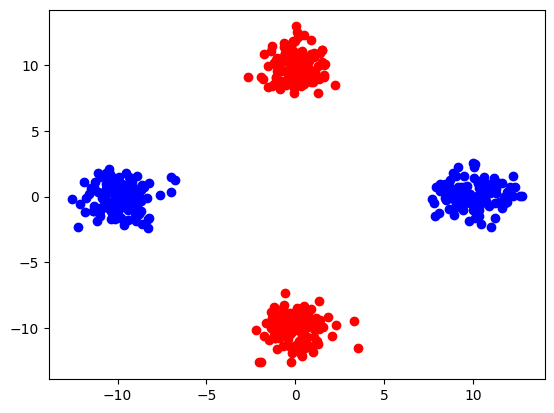

In [10]:
plt.plot(class_A[:,0], class_A[:,1], 'ro')
plt.plot(class_B[:,0], class_B[:,1], 'bo')
plt.show()

In [11]:
# combine the two classes into one data set
X = np.row_stack((class_A, class_B))
y = np.row_stack((np.ones((250,1)), np.zeros((250,1))))
y = np.ravel(y)

#shuffling the points
idx = np.random.permutation(500)
X = X[idx]
y = y[idx]


# divide the data into training and test data, 400 points for training and 100 for testing
X_train = X[:400]
y_train = y[:400]
X_test = X[400:]
y_test = y[400:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(400, 2) (400,) (100, 2) (100,)


### Rocchio Classifier

In [12]:
class RocchioClassifier:
    def __init__(self):
        # dictionary to store the centroids of each class
        self.centroids = None

    def fit(self, X_train, y_train):
        # find the centroid of each class
        unique_classes = np.unique(y_train)
        self.centroids = {}
        for cls in unique_classes:
            cls_data = X_train[y_train == cls]
            # calculate the mean of the data points in the class
            self.centroids[cls] = np.mean(cls_data, axis=0)
            print(f"Centroid for class {cls}: {self.centroids[cls]}")

    def predict(self, X_test):
        if self.centroids is None:
            raise ValueError("Classifier not fitted yet. Call fit method first.")
        
        # predict the class of each test point
        y_pred = []
        for x in X_test:
            # find the nearest centroid
            nearest_cls = None
            min_distance = float('inf')
            # iterate over the centroids
            for cls, centroid in self.centroids.items():
                distance = np.linalg.norm(x - centroid)
                if distance < min_distance:
                    min_distance = distance
                    nearest_cls = cls
            # assign the class of the nearest centroid to the test point
            y_pred.append(nearest_cls)
        return y_pred

In [13]:
# train the classifier
rochhio = RocchioClassifier()
rochhio.fit(X_train, y_train)

# test the classifier
y_pred = rochhio.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy}")

Centroid for class 0.0: [0.63268279 0.06018443]
Centroid for class 1.0: [-0.00705175  0.1548289 ]
Accuracy: 0.44


Since both centroids are very close to each other, Rocchio Classifier performs poorly.

### KNN Classifier

In [14]:
# KNN Classifier
class KNNClassifier:
    def __init__(self, k=10):
        # number of nearest neighbors to consider
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        # predict the class of each test point
        y_pred = []
        for x in X_test:
            # find the k nearest neighbors
            distances = np.linalg.norm(self.X_train - x, axis=1)
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]

            # find the most common label among the nearest neighbors
            counts = Counter(nearest_labels)
            most_common_label  = counts.most_common(1)[0][0]
            y_pred.append(most_common_label)
        return y_pred

In [15]:
# train the classifier
knn = KNNClassifier()
knn.fit(X_train, y_train)

# test the classifier
y_pred = knn.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0
